# 项目：分析鸢尾花种类数据

## 分析目标

此数据分析报告的目的是基于鸢尾花的属性数据，分析两种鸢尾花萼片、花瓣的长度和宽度平均值，是否存在显著性差异，让我们可以对不同种类鸢尾花的属性特征进行推断。

## 简介

原始数据`Iris.csv`包括两种鸢尾花，每种有 50 个样本，以及每个样本的一些属性，包括萼片的长度和宽度、花瓣的长度和宽度。

`Iris.csv`每列的含义如下：
- Id：样本的ID。
- SepalLengthCm：萼片的长度（单位为厘米）。
- SepalWidthCm：萼片的宽度（单位为厘米）。
- PetalLengthCm：花瓣的长度（单位为厘米）。
- PetalWidthCm：花瓣的宽度（单位为厘米）。
- Species：鸢尾花种类。

# 导入数据

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
original_iris = pd.read_csv("D:\练习\项目实战_分析鸢尾花种类\Iris.csv")

In [5]:
original_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# 评估数据和清洗数据

复制`original_iris`并赋值为`cleaned_original_iris`，之后所做的所有清洗，都在`cleaned_original_iris`上进行。

In [6]:
cleaned_original_iris = original_iris.copy()

#### 评估数据的整齐程度

In [7]:
cleaned_original_iris.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
93,94,5.0,2.3,3.3,1.0,Iris-versicolor
22,23,4.6,3.6,1.0,0.2,Iris-setosa
29,30,4.7,3.2,1.6,0.2,Iris-setosa
11,12,4.8,3.4,1.6,0.2,Iris-setosa
61,62,5.9,3.0,4.2,1.5,Iris-versicolor


数据满足一行为一个观察值，一列为一个变量，一个单元格为一个值的要求，因此不需要对数据的结构做任何调整。

#### 评估数据的干净程度

空缺值的查找

In [8]:
cleaned_original_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             100 non-null    int64  
 1   SepalLengthCm  100 non-null    float64
 2   SepalWidthCm   100 non-null    float64
 3   PetalLengthCm  100 non-null    float64
 4   PetalWidthCm   100 non-null    float64
 5   Species        100 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 4.8+ KB


根据结果显示，一共100个数据样本，没有缺失值，因此不需要清理缺失值。

但是，应将`id`的格式从数字改为字符串，`species`的格式从字符串改为类别。

In [9]:
cleaned_original_iris['Id'] = cleaned_original_iris['Id'].astype('str')

In [10]:
cleaned_original_iris['Species'] = cleaned_original_iris['Species'].astype('category')

In [11]:
cleaned_original_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             100 non-null    object  
 1   SepalLengthCm  100 non-null    float64 
 2   SepalWidthCm   100 non-null    float64 
 3   PetalLengthCm  100 non-null    float64 
 4   PetalWidthCm   100 non-null    float64 
 5   Species        100 non-null    category
dtypes: category(1), float64(4), object(1)
memory usage: 4.2+ KB


重复值的查找

In [12]:
cleaned_original_iris['Id'].duplicated().sum()

0

数据没有重复值

不一致数据的查找

In [13]:
cleaned_original_iris['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Name: count, dtype: int64

没有不一致的数据

不合理数据的查找

In [14]:
cleaned_original_iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,100.000000,100.000000,100.000000,100.000000
mean,5.471000,3.094000,2.862000,0.785000
std,0.641698,0.476057,1.448565,0.566288
min,4.300000,2.000000,1.000000,0.100000
25%,5.000000,2.800000,1.500000,0.200000
50%,5.400000,3.050000,2.450000,0.800000
75%,5.900000,3.400000,4.325000,1.300000
max,7.000000,4.400000,5.100000,1.800000


数据没有不合理的值

# 保存清理的数据

In [15]:
cleaned_original_iris.to_csv("D:\练习\项目实战_分析鸢尾花种类\Iris.csv", index=False)

# 数据的可视化

分析的目的是分析两种鸢尾花萼片、花瓣的长度和宽度平均值，是否存在显著性差异

直接使用`pairplot`图表，用不同的颜色表示种类。

In [16]:
sns.set_palette('CMRmap')

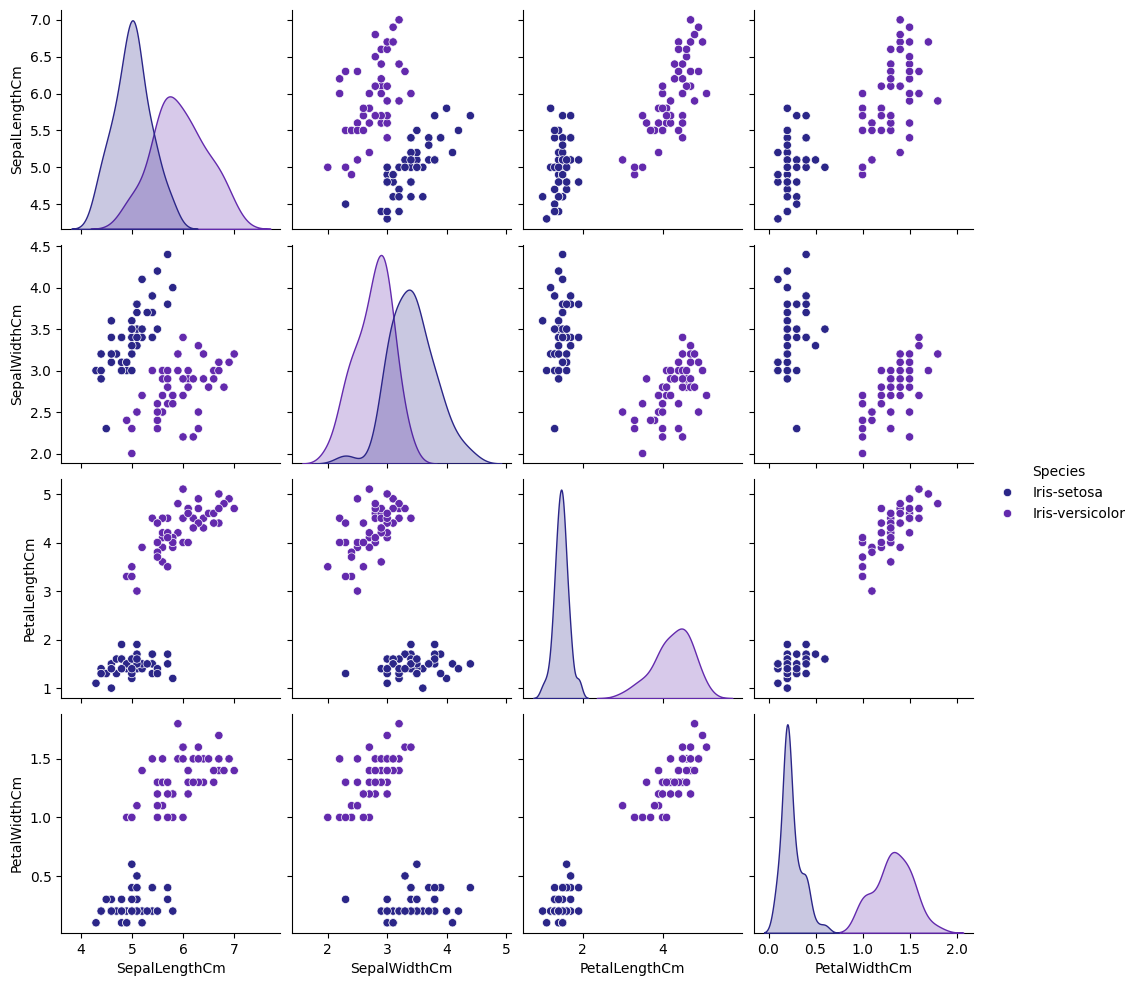

In [17]:
sns.pairplot(cleaned_original_iris, hue='Species')

从图表中很明显地看处数据参数和类别是有统计学差异的。

# 独立双样本t检验

#### t值检验

In [18]:
from scipy.stats import ttest_ind

检验两种花的花萼长度是否有差异

In [19]:
sepal_IS_length = cleaned_original_iris.query("Species =='Iris-setosa'")['SepalLengthCm']
sepal_IV_length = cleaned_original_iris.query("Species =='Iris-versicolor'")['SepalLengthCm']

建立假设：    
$H_0$   两种化的花萼长度没有差异           
$H_1$  两种花的花萼长度存在差异

双尾检验

确定显著水平为0.05

In [20]:
# 计算t值
t_stat, p_value = ttest_ind(sepal_IS_length, sepal_IV_length)
print(t_stat, p_value)

-10.52098626754911 8.985235037487079e-18


In [21]:
alpha = 0.05

if p_value > 0.05:
    print('两种花的花萼长度不存在差异')
else:
    print('两种花的花萼长度存在差异')

两种花的花萼长度存在差异


检验两种花的花萼宽度是否存在差异

In [22]:
sepal_IS_width = cleaned_original_iris.query("Species == 'Iris-setosa'")['SepalWidthCm']
sepal_IV_width = cleaned_original_iris.query("Species == 'Iris-versicolor'")['SepalWidthCm']

建立假设：    
$H_0$  两种化的花萼长度没有差异           
$H_1$ 两种花的花萼长度存在差异

双尾检验

确定显著水平为0.05

In [23]:
# 计算t值
t_stat, p_value = ttest_ind(sepal_IS_width, sepal_IV_width)

In [24]:
alpha = 0.05

if p_value > 0.05:
    print('两种花的花萼宽度不存在差异')
else:
    print('两种花的花萼宽度存在差异')

两种花的花萼宽度存在差异


检验两种花的花瓣长度是否存在差异

In [25]:
petal_IS_length = cleaned_original_iris.query("Species =='Iris-setosa'")['PetalLengthCm']
petal_IV_length = cleaned_original_iris.query("Species =='Iris-versicolor'")['PetalLengthCm']

建立假设：    
$H_0$  两种化的花瓣长度没有差异           
$H_1$   两种花的花瓣长度存在差异

双尾检验

确定显著水平为0.05

In [26]:
# 计算t值
t_stat, p_value = ttest_ind(petal_IS_length , petal_IV_length)
print(t_stat, p_value)

-39.46866259397272 5.717463758170621e-62


In [27]:
alpha = 0.05

if p_value > 0.05:
    print('两种花的花瓣长度不存在差异')
else:
    print('两种花的花瓣长度存在差异')

两种花的花瓣长度存在差异


检验两种花的花瓣宽度是否存在差异


In [28]:
petal_IS_width = cleaned_original_iris.query("Species =='Iris-setosa'")['PetalWidthCm']
petal_IV_width = cleaned_original_iris.query("Species =='Iris-versicolor'")['PetalWidthCm']

建立假设：    
$H_0$  两种化的花瓣长度没有差异           
$H_1$  两种花的花瓣长度存在差异

双尾检验

确定显著水平为0.05

In [29]:
# 计算t值
t_stat, p_value = ttest_ind(petal_IS_width, petal_IV_width)

In [30]:
alpha = 0.05

if p_value > 0.05:
    print('两种花的花瓣长度不存在差异')
else:
    print('两种花的花瓣长度存在差异')

两种花的花瓣长度存在差异


根据上述结果，可以得出结论，两种花的花萼长度，花萼宽度，花瓣长度和花瓣宽度是存在统计显著差异的。